![](https://uploaddeimagens.com.br/images/003/148/930/full/dia3.png?1616609696')

# Criei meu modelo preditivo, e agora?!

---

*   Fazer dele uma API
*   Fazer dele uma aplicação web com Django/Flask
*   Criar notebook e compartilhar por aí, incluindo Kaggle/Portfólio
* Enviar ao github
*    Serializar com Pickle
*   Streamlit!





### Pickle

---
![](https://www.smartfile.com/blog/wp-content/uploads/2015/11/python-pickle-800x200.png)

O módulo pickle implementa um algoritmo para transformar um objeto Python arbitrário em uma série de bytes. Esse processo também é chamado de “serializar” o objeto. 

Em várias instâncias, enquanto trabalhamos no desenvolvimento de um modelo de aprendizado de máquina, precisaremos salvar nossos modelos de previsão em um arquivo e, em seguida, restaurá-los para reutilizar nos dados que ainda virão.

Precisamos salvar e restaurar mais tarde nosso modelo de ML, para:

1. testar nosso modelo com novos dados,
2. comparar vários modelos,
3. ou qualquer outra coisa.

***Serialização de objetos:*** Este processo de salvar um modelo de ML também é conhecido como serialização de objetos - representa um objeto com um fluxo de bytes, a fim de armazená-lo em disco, enviá-lo pela rede ou salvar em um banco de dados.

***Desserialização:*** O procedimento de recarregar o modelo de ML é conhecido como desserialização.

Exploraremos 3 maneiras de salvar e recarregar modelos de ML em Python e scikit-learn:

1. Abordagem Pickle
2. Abordagem Joblib
3. Abordagem de salvamento e restauração manual para JSON

Agora, vamos desenvolver um modelo de ML que usaremos para salvar e recarregar.

In [ ]:
# Import Required packages 
#-------------------------

# Import the Logistic Regression Module from Scikit Learn
from sklearn.linear_model import LogisticRegression  

# Import the IRIS Dataset to be used in this Kernel
from sklearn.datasets import load_iris  

# Load the Module to split the Dataset into Train & Test 
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
Iris_data = load_iris() 

In [ ]:
# Split data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Iris_data.data, 
                                                Iris_data.target, 
                                                test_size=0.3, 
                                                random_state=4)  

In [ ]:
# Define the Model
LR_Model = LogisticRegression(C=0.1,  
                               max_iter=20, 
                               fit_intercept=True, 
                               n_jobs=3, 
                               solver='liblinear')

# Train the Model
LR_Model.fit(Xtrain, Ytrain)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# pypi
!pip install pickle-mixin
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=5999 sha256=ce5705d0b971032e1ae2c8134145a77e9c2b018eeeaa83ef64ff7b6f017e2760
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(Xtest, Ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(Xtest)  

print(Ytest)
print('**************************')
print(Ypredict)

Test score: 91.11 %
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]
**************************
[2 0 2 2 2 2 2 0 0 2 0 0 0 2 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 2 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]


## Joblib

In [ ]:
# Import Joblib Module from Scikit Learn

from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Save RL_Model to file in the current working directory
joblib_file = "joblib_RL_Model.pkl"  
joblib.dump(LR_Model, joblib_file)

['joblib_RL_Model.pkl']

In [ ]:
# Load from file
joblib_LR_model = joblib.load(joblib_file)
joblib_LR_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20,
                   multi_class='auto', n_jobs=3, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Use the Reloaded Joblib Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = joblib_LR_model.score(Xtest, Ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = joblib_LR_model.predict(Xtest)  
Ypredict

Test score: 91.11 %


array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

## JSON

In [ ]:
# Import required packages
import json  
import numpy as np

In [ ]:
class MyLogReg(LogisticRegression):

    # Override the class constructor
    def __init__(self, C=1.0, solver='liblinear', max_iter=100, X_train=None, Y_train=None):
        LogisticRegression.__init__(self, C=C, solver=solver, max_iter=max_iter)
        self.X_train = X_train
        self.Y_train = Y_train

    # A method for saving object data to JSON file
    def save_json(self, filepath):
        dict_ = {}
        dict_['C'] = self.C
        dict_['max_iter'] = self.max_iter
        dict_['solver'] = self.solver
        dict_['X_train'] = self.X_train.tolist() if self.X_train is not None else 'None'
        dict_['Y_train'] = self.Y_train.tolist() if self.Y_train is not None else 'None'

        # Creat json and save to file
        json_txt = json.dumps(dict_, indent=4)
        with open(filepath, 'w') as file:
            file.write(json_txt)

    # A method for loading data from JSON file
    def load_json(self, filepath):
        with open(filepath, 'r') as file:
            dict_ = json.load(file)

        self.C = dict_['C']
        self.max_iter = dict_['max_iter']
        self.solver = dict_['solver']
        self.X_train = np.asarray(dict_['X_train']) if dict_['X_train'] != 'None' else None
        self.Y_train = np.asarray(dict_['Y_train']) if dict_['Y_train'] != 'None' else Non

In [ ]:
filepath = "mylogreg.json"

# Create a model and train it
mylogreg = MyLogReg(X_train=Xtrain, Y_train=Ytrain)  
mylogreg.save_json(filepath)

# Create a new object and load its data from JSON file
json_mylogreg = MyLogReg()  
json_mylogreg.load_json(filepath)  
json_mylogreg  

MyLogReg(C=1.0,
         X_train=array([[4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4...
       [6.4, 3.1, 5.5, 1.8],
       [7. , 3.2, 4.7, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [6.5, 3. , 5.8, 2.2],
       [7.2, 3. , 5.8, 1.6],
       [7.7, 2.8, 6.7, 2. ]]),
         Y_train=array([0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 2,

Maiores infos em https://www.kaggle.com/prmohanty/python-how-to-save-and-load-ml-models?select=mylogreg.json

## Streamlit!

---
https://streamlit.io/ 


1. Crie uma pasta dentro de seu computador para hospedar os arquivos dos diversos projetos que faremos.
2. Abra o sublime text 3 e crie um arquivo chamado app.py vazio.
3. No terminal de sua máquina, inicie um ambiente isolado com as instruções abaixo e instale cada biblioteca faltante no mesmo.

In [ ]:
# Ambiente isolado
!pip install virtualenv

# No terminal execute:
!python -m venv ambiente
!cd env 
!cd Scripts
!activate

In [ ]:
!pip install streamlit

### NBA

---


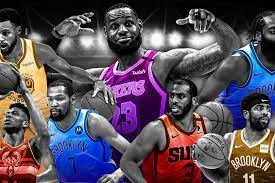

In [ ]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.title('NBA Player Stats Explorer')

st.markdown("""
This app performs simple webscraping of NBA player stats data!
* **Python libraries:** base64, pandas, streamlit
* **Data source:** [Basketball-reference.com](https://www.basketball-reference.com/).
""")

st.sidebar.header('User Input Features')
selected_year = st.sidebar.selectbox('Year', list(reversed(range(1950,2020))))

# Web scraping of NBA player stats
@st.cache
def load_data(year):
    url = "https://www.basketball-reference.com/leagues/NBA_" + str(year) + "_per_game.html"
    html = pd.read_html(url, header = 0)
    df = html[0]
    raw = df.drop(df[df.Age == 'Age'].index) # Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)

# Sidebar - Team selection
sorted_unique_team = sorted(playerstats.Tm.unique())
selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)

# Sidebar - Position selection
unique_pos = ['C','PF','SF','PG','SG']
selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)

# Filtering data
df_selected_team = playerstats[(playerstats.Tm.isin(selected_team)) & (playerstats.Pos.isin(selected_pos))]

st.header('Display Player Stats of Selected Team(s)')
st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
st.dataframe(df_selected_team)

# Download NBA player stats data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="playerstats.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_team), unsafe_allow_html=True)

# Heatmap
if st.button('Intercorrelation Heatmap'):
    st.header('Intercorrelation Matrix Heatmap')
    df_selected_team.to_csv('output.csv',index=False)
    df = pd.read_csv('output.csv')

    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
    st.pyplot()

### NFL


---

![](https://www.lance.com.br/files/article_main/uploads/2021/01/17/6004c131335db.jpeg)

In [ ]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.title('NFL Football Stats (Rushing) Explorer')

st.markdown("""
This app performs simple webscraping of NFL Football player stats data (focusing on Rushing)!
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn
* **Data source:** [pro-football-reference.com](https://www.pro-football-reference.com/).
""")

st.sidebar.header('User Input Features')
selected_year = st.sidebar.selectbox('Year', list(reversed(range(1990,2020))))

# Web scraping of NFL player stats
# https://www.pro-football-reference.com/years/2019/rushing.htm
@st.cache
def load_data(year):
    url = "https://www.pro-football-reference.com/years/" + str(year) + "/rushing.htm"
    html = pd.read_html(url, header = 1)
    df = html[0]
    raw = df.drop(df[df.Age == 'Age'].index) # Deletes repeating headers in content
    raw = raw.fillna(0)
    playerstats = raw.drop(['Rk'], axis=1)
    return playerstats
playerstats = load_data(selected_year)

# Sidebar - Team selection
sorted_unique_team = sorted(playerstats.Tm.unique())
selected_team = st.sidebar.multiselect('Team', sorted_unique_team, sorted_unique_team)

# Sidebar - Position selection
unique_pos = ['RB','QB','WR','FB','TE']
selected_pos = st.sidebar.multiselect('Position', unique_pos, unique_pos)

# Filtering data
df_selected_team = playerstats[(playerstats.Tm.isin(selected_team)) & (playerstats.Pos.isin(selected_pos))]

st.header('Display Player Stats of Selected Team(s)')
st.write('Data Dimension: ' + str(df_selected_team.shape[0]) + ' rows and ' + str(df_selected_team.shape[1]) + ' columns.')
st.dataframe(df_selected_team)

# Download NBA player stats data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="playerstats.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_team), unsafe_allow_html=True)

# Heatmap
if st.button('Intercorrelation Heatmap'):
    st.header('Intercorrelation Matrix Heatmap')
    df_selected_team.to_csv('output.csv',index=False)
    df = pd.read_csv('output.csv')

    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
    st.pyplot()

In [ ]:
!streamlit run app.py

DNA

---
![](https://www.saudebusiness.com/sites/saudebusiness.com/files/styles/article_featured_retina/public/uploads/2016/02/DNA_187967735.jpg?itok=Ix45xJku)

O nucleotídeo é um conjunto formado pela associação de 3 moléculas – uma base nitrogenada, um grupamento fosfato e um glicídio do grupo das pentoses. ... Na formação da estrutura do DNA, temos as bases nitrogenadas Adenina, Guanina, Timina e Citosina, e na composição do RNA temos a Adenina, Guanina, Uracila e Citosina.

In [ ]:
######################
# Import libraries
######################

import pandas as pd
import streamlit as st
import altair as alt
from PIL import Image
#! pip install pillow

######################
# Page Title
######################

image = Image.open('dna-logo.jpg')

st.image(image, use_column_width=True)

st.write("""
# DNA Nucleotide Count Web App

This app counts the nucleotide composition of query DNA!

***
""")


######################
# Input Text Box
######################

#st.sidebar.header('Enter DNA sequence')
st.header('Enter DNA sequence')

sequence_input = ">DNA Query 2\nGAACACGTGGAGGCAAACAGGAAGGTGAAGAAGAACTTATCCTATCAGGACGGAAGGTCCTGTGCTCGGG\nATCTTCCAGACGTCGCGACTCTAAATTGCCCCCTCTGAGGTCAAGGAACACAAGATGGTTTTGGAAATGC\nTGAACCCGATACATTATAACATCACCAGCATCGTGCCTGAAGCCATGCCTGCTGCCACCATGCCAGTCCT"

#sequence = st.sidebar.text_area("Sequence input", sequence_input, height=250)
sequence = st.text_area("Sequence input", sequence_input, height=250)
sequence = sequence.splitlines()
sequence = sequence[1:] # Skips the sequence name (first line)
sequence = ''.join(sequence) # Concatenates list to string

st.write("""
***
""")

## Prints the input DNA sequence
st.header('INPUT (DNA Query)')
sequence

## DNA nucleotide count
st.header('OUTPUT (DNA Nucleotide Count)')

### 1. Print dictionary
st.subheader('1. Print dictionary')
def DNA_nucleotide_count(seq):
  d = dict([
            ('A',seq.count('A')),
            ('T',seq.count('T')),
            ('G',seq.count('G')),
            ('C',seq.count('C'))
            ])
  return d

X = DNA_nucleotide_count(sequence)

#X_label = list(X)
#X_values = list(X.values())

X

### 2. Print text
st.subheader('2. Print text')
st.write('There are  ' + str(X['A']) + ' adenine (A)')
st.write('There are  ' + str(X['T']) + ' thymine (T)')
st.write('There are  ' + str(X['G']) + ' guanine (G)')
st.write('There are  ' + str(X['C']) + ' cytosine (C)')

### 3. Display DataFrame
st.subheader('3. Display DataFrame')
df = pd.DataFrame.from_dict(X, orient='index')
df = df.rename({0: 'count'}, axis='columns')
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'nucleotide'})
st.write(df)

### 4. Display Bar Chart using Altair
st.subheader('4. Display Bar chart')
p = alt.Chart(df).mark_bar().encode(
    x='nucleotide',
    y='count'
)
p = p.properties(
    width=alt.Step(80)  # controls width of bar.
)
st.write(p)


In [ ]:
!streamlit run app.py

### AÇÕES

---

![](https://comoinvestir.thecap.com.br/wp-content/uploads/2021/03/ibovespa-fecha-na-maxima-em-quase-1-mes-com-ajuda-do-fed.jpg)

In [ ]:
import yfinance as yf
import streamlit as st

st.write("""
# Simple Stock Price App

Shown are the stock **closing price** and ***volume*** of Google!

""")

# https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75
#define the ticker symbol
tickerSymbol = 'GOOGL'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2021-3-25')
# Open	High	Low	Close	Volume	Dividends	Stock Splits

st.write("""
## Closing Price
""")
st.line_chart(tickerDf.Close)
st.write("""
## Volume Price
""")
st.line_chart(tickerDf.Volume)

In [ ]:
!streamlit run app.py

### S&P500

---
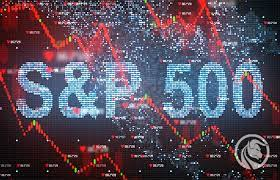


In [ ]:
import streamlit as st
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

st.title('S&P 500 App')

st.markdown("""
This app retrieves the list of the **S&P 500** (from Wikipedia) and its corresponding **stock closing price** (year-to-date)!
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn
* **Data source:** [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
""")

st.sidebar.header('User Input Features')

# Web scraping of S&P 500 data
#
@st.cache
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby('GICS Sector')

# Sidebar - Sector selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

# Filtering data
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

# Download S&P500 data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)

# https://pypi.org/project/yfinance/

data = yf.download(
        tickers = list(df_selected_sector[:10].Symbol),
        period = "ytd",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )

# Plot Closing Price of Query Symbol
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return st.pyplot()

num_company = st.sidebar.slider('Number of Companies', 1, 5)

if st.button('Show Plots'):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector.Symbol)[:num_company]:
        price_plot(i)


In [ ]:
!streamlit run app.py

### BOSTON HOUSING

---
![](https://miro.medium.com/max/1000/1*FHQOSHMMT07CbXpklk1Ehw.jpeg)


In [ ]:
import streamlit as st
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

st.write("""
# Boston House Price Prediction App

This app predicts the **Boston House Price**!
""")
st.write('---')

# Loads the Boston House Price Dataset
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
Y = pd.DataFrame(boston.target, columns=["MEDV"])

# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

def user_input_features():
    CRIM = st.sidebar.slider('CRIM', float(X.CRIM.min()), float(X.CRIM.max()), float(X.CRIM.mean()))
    ZN = st.sidebar.slider('ZN', float(X.ZN.min()), float(X.ZN.max()), float(X.ZN.mean()))
    INDUS = st.sidebar.slider('INDUS', float(X.INDUS.min()), float(X.INDUS.max()), float(X.INDUS.mean()))
    CHAS = st.sidebar.slider('CHAS', float(X.CHAS.min()), float(X.CHAS.max()), float(X.CHAS.mean()))
    NOX = st.sidebar.slider('NOX', float(X.NOX.min()), float(X.NOX.max()), float(X.NOX.mean()))
    RM = st.sidebar.slider('RM', float(X.RM.min()), float(X.RM.max()), float(X.RM.mean()))
    AGE = st.sidebar.slider('AGE', float(X.AGE.min()), float(X.AGE.max()), float(X.AGE.mean()))
    DIS = st.sidebar.slider('DIS', float(X.DIS.min()), float(X.DIS.max()), float(X.DIS.mean()))
    RAD = st.sidebar.slider('RAD', float(X.RAD.min()), float(X.RAD.max()), float(X.RAD.mean()))
    TAX = st.sidebar.slider('TAX', float(X.TAX.min()), float(X.TAX.max()), float(X.TAX.mean()))
    PTRATIO = st.sidebar.slider('PTRATIO', float(X.PTRATIO.min()), float(X.PTRATIO.max()), float(X.PTRATIO.mean()))
    B = st.sidebar.slider('B', float(X.B.min()), float(X.B.max()), float(X.B.mean()))
    LSTAT = st.sidebar.slider('LSTAT', float(X.LSTAT.min()), float(X.LSTAT.max()), float(X.LSTAT.mean()))
    data = {'CRIM': CRIM,
            'ZN': ZN,
            'INDUS': INDUS,
            'CHAS': CHAS,
            'NOX': NOX,
            'RM': RM,
            'AGE': AGE,
            'DIS': DIS,
            'RAD': RAD,
            'TAX': TAX,
            'PTRATIO': PTRATIO,
            'B': B,
            'LSTAT': LSTAT}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Main Panel

# Print specified input parameters
st.header('Specified Input parameters')
st.write(df)
st.write('---')

# Build Regression Model
model = RandomForestRegressor()
model.fit(X, Y)
# Apply Model to Make Prediction
prediction = model.predict(df)

st.header('Prediction of MEDV')
st.write(prediction)
st.write('---')

# Explaining the model's predictions using SHAP values
# https://github.com/slundberg/shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

st.header('Feature Importance')
plt.title('Feature importance based on SHAP values')
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')
st.write('---')

plt.title('Feature importance based on SHAP values (Bar)')
shap.summary_plot(shap_values, X, plot_type="bar")
st.pyplot(bbox_inches='tight')

In [ ]:
!streamlit run app.py

### BITCOIN

---
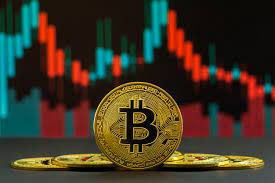


In [ ]:
# This app is for educational purpose only. Insights gained is not financial advice. Use at your own risk!
import streamlit as st
from PIL import Image
import pandas as pd
import base64
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import time
#---------------------------------#
# New feature (make sure to upgrade your streamlit library)
# pip install --upgrade streamlit

#---------------------------------#
# Page layout
## Page expands to full width
st.set_page_config(layout="wide")
#---------------------------------#
# Title

#image = Image.open('logo.jpg')
#st.image(image, width = 500)

st.title('Crypto Price App')
st.markdown("""
This app retrieves cryptocurrency prices for the top 100 cryptocurrency from the **CoinMarketCap**!

""")
#---------------------------------#
# About
expander_bar = st.beta_expander("About")
expander_bar.markdown("""
* **Python libraries:** base64, pandas, streamlit, numpy, matplotlib, seaborn, BeautifulSoup, requests, json, time
* **Data source:** [CoinMarketCap](http://coinmarketcap.com).
* **Credit:** Web scraper adapted from the Medium article *[Web Scraping Crypto Prices With Python](https://towardsdatascience.com/web-scraping-crypto-prices-with-python-41072ea5b5bf)* written by [Bryan Feng](https://medium.com/@bryanf).
""")


#---------------------------------#
# Page layout (continued)
## Divide page to 3 columns (col1 = sidebar, col2 and col3 = page contents)
col1 = st.sidebar
col2, col3 = st.beta_columns((2,1))

#---------------------------------#
# Sidebar + Main panel
col1.header('Input Options')

## Sidebar - Currency price unit
currency_price_unit = col1.selectbox('Select currency for price', ('USD', 'BTC', 'ETH'))

# Web scraping of CoinMarketCap data
@st.cache
def load_data():
    cmc = requests.get('https://coinmarketcap.com')
    soup = BeautifulSoup(cmc.content, 'html.parser')

    data = soup.find('script', id='__NEXT_DATA__', type='application/json')
    coins = {}
    coin_data = json.loads(data.contents[0])
    listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']
    for i in listings:
      coins[str(i['id'])] = i['slug']

    coin_name = []
    coin_symbol = []
    market_cap = []
    percent_change_1h = []
    percent_change_24h = []
    percent_change_7d = []
    price = []
    volume_24h = []

    for i in listings:
      coin_name.append(i['slug'])
      coin_symbol.append(i['symbol'])
      price.append(i['quote']['price'])
      percent_change_1h.append(i['quote']['percent_change_1h'])
      percent_change_24h.append(i['quote']['percent_change_24h'])
      percent_change_7d.append(i['quote']['percent_change_7d'])
      market_cap.append(i['quote']['market_cap'])
      volume_24h.append(i['quote']['volume_24h'])

    df = pd.DataFrame(columns=['coin_name', 'coin_symbol', 'market_cap', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'price', 'volume_24h'])
    df['coin_name'] = coin_name
    df['coin_symbol'] = coin_symbol
    df['price'] = price
    df['percent_change_1h'] = percent_change_1h
    df['percent_change_24h'] = percent_change_24h
    df['percent_change_7d'] = percent_change_7d
    df['market_cap'] = market_cap
    df['volume_24h'] = volume_24h
    return df

df = load_data()

## Sidebar - Cryptocurrency selections
sorted_coin = sorted( df['coin_symbol'] )
selected_coin = col1.multiselect('Cryptocurrency', sorted_coin, sorted_coin)

df_selected_coin = df[ (df['coin_symbol'].isin(selected_coin)) ] # Filtering data

## Sidebar - Number of coins to display
num_coin = col1.slider('Display Top N Coins', 1, 100, 100)
df_coins = df_selected_coin[:num_coin]

## Sidebar - Percent change timeframe
percent_timeframe = col1.selectbox('Percent change time frame',
                                    ['7d','24h', '1h'])
percent_dict = {"7d":'percent_change_7d',"24h":'percent_change_24h',"1h":'percent_change_1h'}
selected_percent_timeframe = percent_dict[percent_timeframe]

## Sidebar - Sorting values
sort_values = col1.selectbox('Sort values?', ['Yes', 'No'])

col2.subheader('Price Data of Selected Cryptocurrency')
col2.write('Data Dimension: ' + str(df_selected_coin.shape[0]) + ' rows and ' + str(df_selected_coin.shape[1]) + ' columns.')

col2.dataframe(df_coins)

# Download CSV data
# https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="crypto.csv">Download CSV File</a>'
    return href

col2.markdown(filedownload(df_selected_coin), unsafe_allow_html=True)

#---------------------------------#
# Preparing data for Bar plot of % Price change
col2.subheader('Table of % Price Change')
df_change = pd.concat([df_coins.coin_symbol, df_coins.percent_change_1h, df_coins.percent_change_24h, df_coins.percent_change_7d], axis=1)
df_change = df_change.set_index('coin_symbol')
df_change['positive_percent_change_1h'] = df_change['percent_change_1h'] > 0
df_change['positive_percent_change_24h'] = df_change['percent_change_24h'] > 0
df_change['positive_percent_change_7d'] = df_change['percent_change_7d'] > 0
col2.dataframe(df_change)

# Conditional creation of Bar plot (time frame)
col3.subheader('Bar plot of % Price Change')

if percent_timeframe == '7d':
    if sort_values == 'Yes':
        df_change = df_change.sort_values(by=['percent_change_7d'])
    col3.write('*7 days period*')
    plt.figure(figsize=(5,25))
    plt.subplots_adjust(top = 1, bottom = 0)
    df_change['percent_change_7d'].plot(kind='barh', color=df_change.positive_percent_change_7d.map({True: 'g', False: 'r'}))
    col3.pyplot(plt)
elif percent_timeframe == '24h':
    if sort_values == 'Yes':
        df_change = df_change.sort_values(by=['percent_change_24h'])
    col3.write('*24 hour period*')
    plt.figure(figsize=(5,25))
    plt.subplots_adjust(top = 1, bottom = 0)
    df_change['percent_change_24h'].plot(kind='barh', color=df_change.positive_percent_change_24h.map({True: 'g', False: 'r'}))
    col3.pyplot(plt)
else:
    if sort_values == 'Yes':
        df_change = df_change.sort_values(by=['percent_change_1h'])
    col3.write('*1 hour period*')
    plt.figure(figsize=(5,25))
    plt.subplots_adjust(top = 1, bottom = 0)
    df_change['percent_change_1h'].plot(kind='barh', color=df_change.positive_percent_change_1h.map({True: 'g', False: 'r'}))
    col3.pyplot(plt)


In [ ]:
from PIL import Image
import pandas as pd
import base64
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import time

def load_data():
    cmc = requests.get('https://coinmarketcap.com')
    soup = BeautifulSoup(cmc.content, 'html.parser')

    data = soup.find('script', id='__NEXT_DATA__', type='application/json')
    coins = {}
    coin_data = json.loads(data.contents[0])
    listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']
    print(listings)
    for i in listings:
      coins[str(i['id'])] = i['slug']

    coin_name = []
    coin_symbol = []
    market_cap = []
    percent_change_1h = []
    percent_change_24h = []
    percent_change_7d = []
    price = []
    volume_24h = []

    for i in listings:
      coin_name.append(i['slug'])
      coin_symbol.append(i['symbol'])
      price.append(i['quote'][currency_price_unit]['price'])
      
      percent_change_1h.append(i['quote'][currency_price_unit]['percent_change_1h'])
      percent_change_24h.append(i['quote'][currency_price_unit]['percent_change_24h'])
      percent_change_7d.append(i['quote'][currency_price_unit]['percent_change_7d'])
      
      market_cap.append(i['quote'][currency_price_unit]['market_cap'])
      volume_24h.append(i['quote'][currency_price_unit]['volume_24h'])

    df = pd.DataFrame(columns=['coin_name', 'coin_symbol', 'market_cap', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'price', 'volume_24h']).apply(pd.Series)
    df['coin_name'] = coin_name
    df['coin_symbol'] = coin_symbol
    df['price'] = price
    df['percent_change_1h'] = percent_change_1h
    df['percent_change_24h'] = percent_change_24h
    df['percent_change_7d'] = percent_change_7d
    df['market_cap'] = market_cap
    df['volume_24h'] = volume_24h
    return df

load_data()

[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'arrington-xrp-capital'], 'cmcRank': 1, 'marketPairCount': 9585, 'circulatingSupply': 18664525, 'totalSupply': 18664525, 'maxSupply': 21000000, 'ath': 61683.86401412, 'atl': 65.52600098, 'high24h': 53392.38600133, 'low24h': 50856.5686854, 'isActive': 1, 'lastUpdated': '2021-03-26T02:12:02.000Z', 'dateAdded': '2013-04-28T00:00:00.000Z', 'quotes': [{'name': 'btc', 'price': 1, 'volume24h': 1173125.34637395, 'volume7d': 84653048.88412088, 'volume30d': 614887189.6654704, 'marketCap': 18664525, 'percentChange1h': 0, 'percentChange24h': 0, 'percentChange7d': 0, 'lastUpdated': '2021-03-26T02:12:02.000Z', 'percentChange30d': 7.16694726, 'percentChange60d': 60.71655735, 'percentChange90d': 113.1828726, 'fullyDilluttedMarketCap': 11006082

NameError: ignored

In [ ]:
!streamlit run app.py

### BÔNUS (IRIS)

---

![](https://www.almanac.com/sites/default/files/users/AlmanacStaffArchive/iris-flower-striped_full_width.jpg)

In [ ]:
import streamlit as st
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

st.write("""
# Simple Iris Flower Prediction App

This app predicts the **Iris flower** type!
""")

st.sidebar.header('User Input Parameters')

def user_input_features():
    sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

st.subheader('User Input parameters')
st.write(df)

iris = datasets.load_iris()
X = iris.data
Y = iris.target

clf = RandomForestClassifier()
clf.fit(X, Y)

prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Class labels and their corresponding index number')
st.write(iris.target_names)

st.subheader('Prediction')
st.write(iris.target_names[prediction])
#st.write(prediction)

st.subheader('Prediction Probability')
st.write(prediction_proba)

In [ ]:
!streamlit run app.py

# E AGORA? CONTINUE...

---

Abriremos uma nova turma para a MARATONA DATA SCIENCE(360h), contendo 12 cursos de 30h cada. Abriremos 256 vagas apenas com acesso vitalício. <br><br>
***Preço: R$123,00***<br><br>

***Vagas abertas em 29/03 às 09h. Link no grupo do Whatsapp***

<br>Maiores infos em: https://qoda.com.br/maratona-data-science-by-qoda/
<br>Grupo para vagas antecipadas: https://chat.whatsapp.com/Bwtucly0YfDF2hSFnvD67E 
<br><br>
![alt](https://uploaddeimagens.com.br/images/003/138/338/original/trilha.png?1616075260)